In [5]:
from IPython.display import HTML

HTML('''<style>.btnExample {
  color: #F9F9FF;
  background: #43D1AF;
  font-weight: bold;
  border: 1px solid #43D1AF;
}
 
.btnExample:hover {
  color: #43D1AF;
  background: #F9F9FF;
}</style><script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input class="btnExample" type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [6]:
import folium
from IPython.display import HTML

def display(m, height=600):
    """Takes a folium instance and embed HTML."""
    m._build_map()
    srcdoc = m.HTML.replace('"', '&quot;')
    embed = HTML('<iframe srcdoc="{0}" '
                 'style="width: 100%; height: {1}px; '
                 'border: none"></iframe>'.format(srcdoc, height))
    return embed

In [7]:
from pyspark.sql import SQLContext

sqlContext = SQLContext(sc)

def make_coordinates_dataset(line):
    all_vals = line.split(',')
    return [all_vals[0], all_vals[1], all_vals[2]]

allCoordinates = sc.textFile('./data/Vluchtelingen/coordinates_europe.csv')
headerAll = allCoordinates.take(1)
allCoordinates_filtered = allCoordinates.filter(lambda l: 'Country / territory of asylum/residence' not in l)
allCoordinates_df = allCoordinates_filtered.map(make_coordinates_dataset).toDF()
allCoordinates_df.registerTempTable('allCoordinates')

coordinates = sqlContext.sql('SELECT _1, _2, _3 FROM allCoordinates')

coordinates.registerTempTable('coordinates')
#coordinates.show()

<p style="font-size:25px;">Map of Europe</p>

In [84]:
from IPython.display import Javascript

JS_FUNCTION = """
<script type="text/javascript">
  function interactUpdate(div, newVal){
     var outputs = div.getElementsByTagName("div");
     var controls = div.getElementsByTagName("input");

     var value = "";
     var yearVar = "";
     for(i=0; i<controls.length; i++){
       if((controls[i].type == "range") || controls[i].checked){
         value = value + controls[i].getAttribute("name") + controls[i].value;
       }
     }

     for(i=0; i<outputs.length; i++){
       var name = outputs[i].getAttribute("name");
       if(name == value){
          outputs[i].style.display = 'block';
          yearVar = outputs[i].id;
          var command2 = "yearVar = '" + yearVar + "'";
          var kernel2 = IPython.notebook.kernel;
          kernel2.execute(command2);
          IPython.notebook.execute_cells_below();
       } else if(name != "controls"){
          outputs[i].style.display = 'none';
       }
     }
  }
  
  function setValue(div, newVal){
     var outputs = div.getElementsByTagName("div");
     var controls = div.getElementsByTagName("input");

     var value = "";
     var yearVar = "";
     for(i=0; i<controls.length; i++){
       if((controls[i].type == "range") || controls[i].checked){
         value = value + controls[i].getAttribute("name") + controls[i].value;
       }
     }

     for(i=0; i<outputs.length; i++){
       var name = outputs[i].getAttribute("name");
       if(name == value){
          outputs[i].style.display = 'block';

       } else if(name != "controls"){
          outputs[i].style.display = 'none';
       }
     }
  }
</script>
"""

WIDGETS = """
<style type="text/css">
.form-style-6{
    font: 105% Arial, Helvetica, sans-serif;
    max-width: 400px;
    padding: 16px;
    background: #F7F7F7;
}
.form-style-6 h1{
    background: #43D1AF;
    padding: 20px 0;
    font-size: 150%;
    font-weight: 300;
    text-align: center;
    color: #fff;
    margin: -16px 0px 16px 0px;
}
.form-style-6 input[type="text"],
.form-style-6 input[type="date"],
.form-style-6 input[type="datetime"],
.form-style-6 input[type="email"],
.form-style-6 input[type="number"],
.form-style-6 input[type="search"],
.form-style-6 input[type="time"],
.form-style-6 input[type="url"],
.form-style-6 textarea,
.form-style-6 select 
{
    -webkit-transition: all 0.30s ease-in-out;
    -moz-transition: all 0.30s ease-in-out;
    -ms-transition: all 0.30s ease-in-out;
    -o-transition: all 0.30s ease-in-out;
    outline: none;
    box-sizing: border-box;
    -webkit-box-sizing: border-box;
    -moz-box-sizing: border-box;
    width: 100%;
    background: #fff;
    margin-bottom: 4%;
    border: 1px solid #ccc;
    padding: 3%;
    color: #555;
    font: 95% Arial, Helvetica, sans-serif;
}
.form-style-6 input[type="text"]:focus,
.form-style-6 input[type="date"]:focus,
.form-style-6 input[type="datetime"]:focus,
.form-style-6 input[type="email"]:focus,
.form-style-6 input[type="number"]:focus,
.form-style-6 input[type="search"]:focus,
.form-style-6 input[type="time"]:focus,
.form-style-6 input[type="url"]:focus,
.form-style-6 textarea:focus,
.form-style-6 select:focus
{
    box-shadow: 0 0 5px #43D1AF;
    padding: 3%;
    border: 1px solid #43D1AF;
}

.form-style-6 input[type="submit"],
.form-style-6 input[type="button"]{
    box-sizing: border-box;
    -webkit-box-sizing: border-box;
    -moz-box-sizing: border-box;
    width: 100%;
    padding: 3%;
    background: #43D1AF;
    border-bottom: 2px solid #30C29E;
    border-top-style: none;
    border-right-style: none;
    border-left-style: none;    
    color: #fff;
}
.form-style-6 input[type="submit"]:hover,
.form-style-6 input[type="button"]:hover{
    background: #2EBC99;
}

input[type=range] {
  -webkit-appearance: none;
  margin: 18px 0;
  width: 100%;
}
input[type=range]:focus {
  outline: none;
}
input[type=range]::-webkit-slider-runnable-track {
  width: 100%;
  height: 8.4px;
  cursor: pointer;
  animate: 0.2s;
  box-shadow: 1px 1px 1px #000000, 0px 0px 1px #0d0d0d;
  background: #3071a9;
  border-radius: 1.3px;
  border: 0.2px solid #010101;
}
input[type=range]::-webkit-slider-thumb {
  box-shadow: 1px 1px 1px #000000, 0px 0px 1px #0d0d0d;
  border: 1px solid #000000;
  height: 36px;
  width: 16px;
  border-radius: 3px;
  background: #ffffff;
  cursor: pointer;
  -webkit-appearance: none;
  margin-top: -14px;
}
input[type=range]:focus::-webkit-slider-runnable-track {
  background: #367ebd;
}
input[type=range]::-moz-range-track {
  width: 100%;
  height: 8.4px;
  cursor: pointer;
  animate: 0.2s;
  box-shadow: 1px 1px 1px #000000, 0px 0px 1px #0d0d0d;
  background: #3071a9;
  border-radius: 1.3px;
  border: 0.2px solid #010101;
}
input[type=range]::-moz-range-thumb {
  box-shadow: 1px 1px 1px #000000, 0px 0px 1px #0d0d0d;
  border: 1px solid #000000;
  height: 36px;
  width: 16px;
  border-radius: 3px;
  background: #ffffff;
  cursor: pointer;
}
input[type=range]::-ms-track {
  width: 100%;
  height: 8.4px;
  cursor: pointer;
  animate: 0.2s;
  background: transparent;
  border-color: transparent;
  border-width: 16px 0;
  color: transparent;
}
input[type=range]::-ms-fill-lower {
  background: #2a6495;
  border: 0.2px solid #010101;
  border-radius: 2.6px;
  box-shadow: 1px 1px 1px #000000, 0px 0px 1px #0d0d0d;
}
input[type=range]::-ms-fill-upper {
  background: #3071a9;
  border: 0.2px solid #010101;
  border-radius: 2.6px;
  box-shadow: 1px 1px 1px #000000, 0px 0px 1px #0d0d0d;
}
input[type=range]::-ms-thumb {
  box-shadow: 1px 1px 1px #000000, 0px 0px 1px #0d0d0d;
  border: 1px solid #000000;
  height: 36px;
  width: 16px;
  border-radius: 3px;
  background: #ffffff;
  cursor: pointer;
}
input[type=range]:focus::-ms-fill-lower {
  background: #3071a9;
}
input[type=range]:focus::-ms-fill-upper {
  background: #367ebd;
}
</style>
<div class="form-style-6">
<h1>Pick a Year</h1>
<div>
 <div name="num1", id="1999", value="1999", style="display:block; margin-left: 160px;">
   <p style="font-size:20px;">1999</p>
 </div>
 <div name="num2", id="2000", style="display:none; margin-left: 160px;">
   <p style="font-size:20px;">2000</p>
 </div>
 <div name="num3", id="2001", style="display:none; margin-left: 160px;">
   <p style="font-size:20px;">2001</p>
 </div>
 <div name="num4", id="2002", style="display:none; margin-left: 160px;">
   <p style="font-size:20px;">2002</p>
 </div>
  <div name="num5", id="2003", style="display:none; margin-left: 160px;">
   <p style="font-size:20px;">2003</p>
 </div>
  <div name="num6", id="2004", style="display:none; margin-left: 160px;">
   <p style="font-size:20px;">2004</p>
 </div>
  <div name="num7", id="2005", style="display:none; margin-left: 160px;">
   <p style="font-size:20px;">2005</p>
 </div>
  <div name="num8", id="2006", style="display:none; margin-left: 160px;">
   <p style="font-size:20px;">2006</p>
 </div>
  <div name="num9", id="2007", style="display:none; margin-left: 160px;">
   <p style="font-size:20px;">2007</p>
 </div>
  <div name="num10", id="2008", style="display:none; margin-left: 160px;">
   <p style="font-size:20px;">2008</p>
 </div>
  <div name="num11", id="2009", style="display:none; margin-left: 160px;">
   <p style="font-size:20px;">2009</p>
 </div>
  <div name="num12", id="2010", style="display:none; margin-left: 160px;">
   <p style="font-size:20px;">2010</p>
 </div>
  <div name="num13", id="2011", style="display:none; margin-left: 160px;">
   <p style="font-size:20px;">2011</p>
 </div>
  <div name="num14", id="2012", style="display:none; margin-left: 160px;">
   <p style="font-size:20px;">2012</p>
 </div>
  <div name="num15", id="2013", style="display:none; margin-left: 160px;">
   <p style="font-size:20px;">2013</p>
 </div>
  <div name="num16", id="2014", style="display:none; margin-left: 160px;">
   <p style="font-size:20px;">2014</p>
 </div>
  <div name="num17", id="2015", style="display:none; margin-left: 160px;">
   <p style="font-size:20px;">2015</p>
 </div>
 

  <input type="range" name="num" value="1" min="1" max="17", step="1" style="width:350px; margin-left: 10px;", oninput="setValue(this.parentNode, this.value)", onchange="interactUpdate(this.parentNode, this.value);">
</div></div>

"""


from IPython.display import HTML
HTML(WIDGETS + JS_FUNCTION)

In [85]:
import json
import collections

def make_vluchtelingen_dataset(line):
    all_vals = line.split(',')
    return [all_vals[1], all_vals[3], all_vals[4]]

def make_vluchtelingen_dataset_all(line):
    all_vals = line.split(',')
    return [all_vals[0], all_vals[1], all_vals[2], all_vals[3], all_vals[4]]

allData = sc.textFile('./data/Vluchtelingen/DataEuropa.csv')
headerAll = allData.take(1)
allData_filtered = allData.filter(lambda l: 'Origin' not in l)
allData_df = allData_filtered.map(make_vluchtelingen_dataset_all).toDF()
allData_df.registerTempTable('allData')


data2015 = sqlContext.sql('SELECT DISTINCT _1, sum(_5) FROM allData WHERE _3 = ' + str(yearVar) + ' GROUP BY _1')

data2015.registerTempTable('data2015')

#data2015.show()

test = sqlContext.sql('SELECT coordinates._1, coordinates._2, coordinates._3, data2015.c1 FROM coordinates inner join data2015 on coordinates._1 = data2015._1')
#test.show()

countries = test.map(lambda r: r[0]).collect()
lat = test.map(lambda r: r[1]).collect()
lon = test.map(lambda r: r[2]).collect()
count = test.map(lambda r: r[3]).collect()

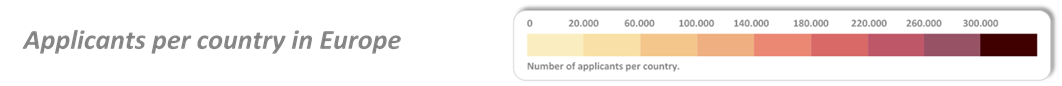

In [86]:
from IPython.display import Image
Image(filename='./data/Vluchtelingen/legend1.png') 

In [87]:
map = folium.Map(location=[50.8504500, 4.3487800], zoom_start=4, tiles='Mapbox Bright')

#for x in range(0, len(countries)):
    #map.simple_marker([lat[x], lon[x]], popup = countries[x] + ' -> refugees: ' + str(count[x]), clustered_marker = True)


color1 = '#faeec0'
color2 = '#f8e0a6'
color3 = '#f4c68b'
color4 = '#efaf80'
color5 = '#ea8873'
color6 = '#d86967'
color7 = '#be5869'
color8 = '#975266'
color9 = '#400000'

def search_color(countAsylum):
    color = ''
    if (countAsylum < 20000):
        color = color1
    else:
        if (countAsylum < 60000):
            color = color2
        else:
            if (countAsylum < 100000):
                color = color3
            else:
                if (countAsylum < 140000):
                    color = color4
                else:
                    if (countAsylum < 180000):
                        color = color5
                    else:
                        if (countAsylum < 220000):
                            color = color6
                        else:
                            if (countAsylum < 260000):
                                color = color7
                            else:
                                if (countAsylum < 300000):
                                    color = color8
                                else:
                                    if (countAsylum > 300000):
                                        color = color9
    return color


for x in range(0, len(countries)):
    map.geo_json(geo_path='./data/Vluchtelingen/countries/' + countries[x] + '.json', fill_color = search_color(count[x]))
    #print countries[x]


display(map)